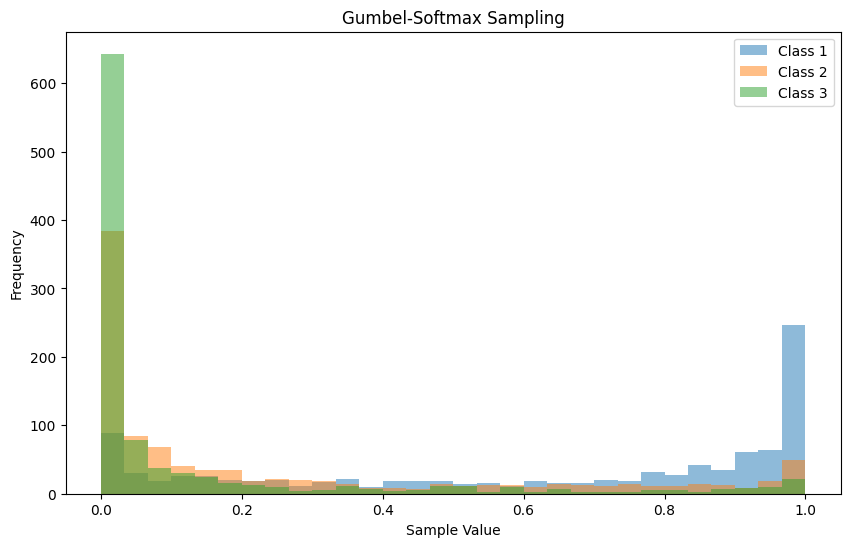

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def gumbel_softmax_sample(logits, temperature):
    """从 Gumbel-softmax 分布中采样"""
    gumbel_noise = -np.log(-np.log(np.random.rand(*logits.shape)))
    y = logits + gumbel_noise
    return np.exp(y / temperature) / np.sum(np.exp(y / temperature), axis=-1, keepdims=True)

# 设置参数
logits = np.array([2.0, 1.0, 0.1])
temperature = 0.5
samples = []

# 生成多个样本
for _ in range(1000):
    sample = gumbel_softmax_sample(logits, temperature)
    samples.append(sample)

samples = np.array(samples)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.hist(samples[:, 0], bins=30, alpha=0.5, label='Class 1')
plt.hist(samples[:, 1], bins=30, alpha=0.5, label='Class 2')
plt.hist(samples[:, 2], bins=30, alpha=0.5, label='Class 3')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Gumbel-Softmax Sampling')
plt.show()